In [1]:
"""! @brief СКБ201 Тур ТВ Методы Программирования ЛР2"""

##
# @mainpage Лабораторная работа номер 2 по курсу "Методы Программирования"
#
# @brief СКБ201 Тур Т.В. Методы Программирования ЛР2
#
# @section intro Введение
# Лабораторная работа номер 2 по курсу "Методы программирования". Выполнена студентом Туром Тимофем Владимировичем группы СКБ201.
#
# @section description Описание
# В данной лабораторной работе тредуется выполнить поиск элементов в массивах, сгенерированных в предыдущей лабораторной работе. Требуется выполнить линейный и бинарный поиск, а также поиск с помощью функции multymap, после чего на графиках сравнить результаты работ для разных размеров массивов.
# Мой вариант - 24. Поиск элементов осуществляется по ключу, которым является первое нечисловое поле объекта из первой лабораторной. В моем случае это поле - ФИО.
#
# @section link Ссылка на репозиторий
# Данный проект хранится в репозитории github по ссылке https://github.com/TimothyTur/MP_L2 .
# В силу явной ненужности многих данных doxygen, они будут отсутствовать там (кроме нужных, например как этот отчет).
#
# @section multimap Библиотека Multymap
# Библиотека multymap как таковая отсутствует в стандартных библиотеках python. Из настандартных удалось найти <a href="https://pypi.org/project/MultiMap/">MultiMap</a>, но в нем не реализован index ни в какой форме, потому этот вариант не подходит. Других вариантов найти не удалось.
# В аналог multimap предлагается использовать <a href="https://docs-python.ru/standart-library/modul-collections-python/klass-defaultdict-modulja-collections/">collections.defaultdict</a>, который в отличии от обычного dict, во-первых, хранит все введенные элементы, даже если они присваивались по одному индексу, во-вторых, для индексов, к которым не привязано значение, возвращает значение по умолчанию. Это, казалось бы, подходит, но это все еще словарь, а значит он реализован на хэш-таблице. То есть каждое обращение по индексу выполняет поиск элемента, в то же время сам поиск элемента занимает константное время.
# Это идет в разрез с изначальной задачей, но это самое близкое к multymap из Си, что есть в python.
#
# @section diagram График времени работы сортировок
# ----- На графике отображено время выполнения поиска в зависимости от числа элементов в выборке. Был выполнен линейный поиск, поиск в объекте multimap, бинарный поиск с предшествующей сортировкой массива и бинарный поиск в уже отсортированном массиве.
# @image latex mpLab2Graph1.png "График работы поиска"
# Бинарный поиск сам по себе по измерениям времени не занимет, но это скорее всего не более чем просто погрешность в записи числа с плавающей точкой. С увеличением числа объектов время должно увеличиваться, но не сильно, так что имеем прямую линию.
# Поиск в объекте multimap в силу реализации в python имеет константное время поиска, от чего его график - тоже прямая.

##
# @file full_code.py
#
# @brief Основной исполняевый файл лабораторной работы
# 
# @sectioin description Описание
# Лабораторная работа в изначальном свое виде выполнялась в оболочке "jupyter notebook" в силу его удобства для таких целей. Этот файл является прямым последовательным копированием ячеек из итогового документа (также прикрепленного в github), по причине того что doxygen на файлы ".ipynb" не работает.
# 
# @section searchResults Результаты работы поиска
# Cледующая секция представляет из себя набор вывода программы по тестам поиска.
# Вывод для всех кроме multimap призводится по формату:
# <размер выборки> <время поиска> <искомый элемент>
# <количественный индекс найденного элемента> <индекс элемента в исходном массиве> <элемент>
# <повторяется для всех найденных элементов>
# --------------------------------------------------
# <повторяется для всех размеров выборок>
# 
# Для multimap (который на самом деле defaultdict) отличие будет в перечислении найденных элементов: индес в исходном массиве не хранится.
# 
# @subsection searchLinear Линейный поиск
# 100 0.0 Недомолкин Елизавета Эдикович
# 0 40 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
# --------------------------------------------------
# 500 0.0010027885437011719 Ташлыков Григорий Николаевич
# 0 93 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
# --------------------------------------------------
# 1000 0.0 Гришаев Андрей Сергеевич
# 0 593 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
# 1 890 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
# --------------------------------------------------
# 2000 0.001001596450805664 Абдуллабеков Илья Николаевна
# 0 1779 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
# --------------------------------------------------
# 5000 0.0009975433349609375 Самунин Тимофей Эдуардович
# 0 4102 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
# --------------------------------------------------
# 10000 0.0019996166229248047 Ташлыков Артём Эдуардович
# 0 4901 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
# 1 6381 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/20 72503
# --------------------------------------------------
# 20000 0.004003763198852539 Красов Илья Александровна
# 0 172 Красов Илья Александровна 20 2006/01/24 2014/04/03 37206
# 1 14136 Красов Илья Александровна 91 2013/04/26 2014/06/28 47384
# 2 16205 Красов Илья Александровна 70 2012/09/19 2013/12/16 68625
# 3 18214 Красов Илья Александровна 93 2005/01/12 2006/08/02 55157
# --------------------------------------------------
# 50000 0.008996963500976562 Осипова Радомир Ашотович
# 0 3801 Осипова Радомир Ашотович 99 2007/12/03 2008/08/06 21649
# 1 12071 Осипова Радомир Ашотович 31 2008/12/03 2012/02/12 59751
# 2 12738 Осипова Радомир Ашотович 30 2006/03/26 2008/09/17 15557
# --------------------------------------------------
# 100000 0.025023460388183594 Грицун Илья Сергеевич
# 0 1551 Грицун Илья Сергеевич 42 2009/06/14 2011/04/01 60423
# 1 3499 Грицун Илья Сергеевич 1 2011/12/06 2013/09/02 92704
# 2 5092 Грицун Илья Сергеевич 28 2011/01/20 2012/11/29 36978
# 3 11380 Грицун Илья Сергеевич 42 2013/05/21 2013/07/05 55761
# 4 14403 Грицун Илья Сергеевич 32 2006/06/04 2009/06/28 36439
# 5 14520 Грицун Илья Сергеевич 22 2004/02/12 2013/02/07 83253
# 6 21080 Грицун Илья Сергеевич 49 2006/05/31 2011/12/26 62574
# 7 22279 Грицун Илья Сергеевич 10 2009/07/16 2010/06/30 2073
# 8 22766 Грицун Илья Сергеевич 13 2006/07/28 2008/01/30 31417
# 9 26603 Грицун Илья Сергеевич 21 2006/12/26 2008/08/05 3046
# 10 27871 Грицун Илья Сергеевич 38 2005/10/19 2008/08/01 90334
# 11 28877 Грицун Илья Сергеевич 51 2004/04/27 2012/12/15 86766
# 12 29755 Грицун Илья Сергеевич 93 2007/12/04 2012/12/22 23949
# 13 29769 Грицун Илья Сергеевич 49 2009/11/24 2013/02/02 93552
# 14 30487 Грицун Илья Сергеевич 5 2006/03/11 2014/01/17 29310
# 15 30896 Грицун Илья Сергеевич 3 2005/10/12 2011/11/24 56023
# 16 32477 Грицун Илья Сергеевич 3 2005/11/04 2006/02/22 12458
# 17 34512 Грицун Илья Сергеевич 65 2009/09/08 2009/12/15 44209
# 18 36371 Грицун Илья Сергеевич 19 2008/01/29 2009/06/10 96476
# 19 39744 Грицун Илья Сергеевич 88 2011/05/31 2013/05/08 34093
# 20 40183 Грицун Илья Сергеевич 71 2006/08/21 2014/05/18 22157
# 21 44701 Грицун Илья Сергеевич 68 2005/03/03 2013/11/13 97173
# 22 47784 Грицун Илья Сергеевич 50 2004/02/01 2014/05/12 17074
# 23 51749 Грицун Илья Сергеевич 7 2012/03/16 2012/09/04 77871
# 24 52688 Грицун Илья Сергеевич 72 2010/11/24 2013/02/06 65360
# 25 52800 Грицун Илья Сергеевич 72 2004/02/19 2014/07/11 82191
# 26 55664 Грицун Илья Сергеевич 50 2008/04/27 2009/08/20 49810
# 27 55846 Грицун Илья Сергеевич 73 2004/06/26 2012/09/17 75095
# 28 56856 Грицун Илья Сергеевич 79 2011/04/15 2014/07/21 54838
# 29 62705 Грицун Илья Сергеевич 76 2005/12/16 2009/04/13 69177
# 30 73736 Грицун Илья Сергеевич 21 2011/02/23 2014/08/05 67466
# 31 76233 Грицун Илья Сергеевич 10 2009/05/03 2014/05/07 81532
# 32 81847 Грицун Илья Сергеевич 71 2008/11/27 2010/12/14 85768
# 33 84213 Грицун Илья Сергеевич 48 2011/04/24 2012/12/14 65357
# 34 88775 Грицун Илья Сергеевич 71 2008/04/13 2009/01/24 10750
# 35 91436 Грицун Илья Сергеевич 96 2012/08/21 2012/10/26 83103
# 36 92344 Грицун Илья Сергеевич 21 2011/07/08 2012/03/22 66960
# 37 94778 Грицун Илья Сергеевич 63 2008/10/19 2009/09/14 62756
# 38 97108 Грицун Илья Сергеевич 38 2008/04/29 2014/10/10 33404
# 39 99750 Грицун Илья Сергеевич 98 2008/11/14 2011/08/11 90242
# --------------------------------------------------
# 
# @subsection searchMultimap Поиск в объекте multimap
# todo
# 
# @subsection searchBinaryWithSort Бинарный поиск с сортировкой
# 100 0.0 Недомолкин Елизавета Эдикович
# 0 45 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
# --------------------------------------------------
# 500 0.001001596450805664 Ташлыков Григорий Николаевич
# 0 384 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
# --------------------------------------------------
# 1000 0.003000497817993164 Гришаев Андрей Сергеевич
# 0 125 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
# 1 126 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
# --------------------------------------------------
# 2000 0.009999752044677734 Абдуллабеков Илья Николаевна
# 0 29 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
# --------------------------------------------------
# 5000 0.026999473571777344 Самунин Тимофей Эдуардович
# 0 3390 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
# --------------------------------------------------
# 10000 0.07000160217285156 Ташлыков Артём Эдуардович
# 0 7941 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/20 72503
# 1 7942 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
# --------------------------------------------------
# 20000 0.14300251007080078 Красов Илья Александровна
# 0 6783 Красов Илья Александровна 93 2005/01/12 2006/08/02 55157
# 1 6784 Красов Илья Александровна 20 2006/01/24 2014/04/03 37206
# 2 6785 Красов Илья Александровна 91 2013/04/26 2014/06/28 47384
# 3 6786 Красов Илья Александровна 70 2012/09/19 2013/12/16 68625
# --------------------------------------------------
# 50000 0.45799732208251953 Осипова Радомир Ашотович
# 0 29857 Осипова Радомир Ашотович 30 2006/03/26 2008/09/17 15557
# 1 29858 Осипова Радомир Ашотович 31 2008/12/03 2012/02/12 59751
# 2 29859 Осипова Радомир Ашотович 99 2007/12/03 2008/08/06 21649
# --------------------------------------------------
# 100000 1.0950562953948975 Грицун Илья Сергеевич
# 0 12345 Грицун Илья Сергеевич 10 2009/05/03 2014/05/07 81532
# 1 12346 Грицун Илья Сергеевич 3 2005/10/12 2011/11/24 56023
# 2 12347 Грицун Илья Сергеевич 50 2008/04/27 2009/08/20 49810
# 3 12348 Грицун Илья Сергеевич 71 2008/04/13 2009/01/24 10750
# 4 12349 Грицун Илья Сергеевич 10 2009/07/16 2010/06/30 2073
# 5 12350 Грицун Илья Сергеевич 32 2006/06/04 2009/06/28 36439
# 6 12351 Грицун Илья Сергеевич 50 2004/02/01 2014/05/12 17074
# 7 12352 Грицун Илья Сергеевич 88 2011/05/31 2013/05/08 34093
# 8 12353 Грицун Илья Сергеевич 42 2013/05/21 2013/07/05 55761
# 9 12354 Грицун Илья Сергеевич 22 2004/02/12 2013/02/07 83253
# 10 12355 Грицун Илья Сергеевич 28 2011/01/20 2012/11/29 36978
# 11 12356 Грицун Илья Сергеевич 96 2012/08/21 2012/10/26 83103
# 12 12357 Грицун Илья Сергеевич 93 2007/12/04 2012/12/22 23949
# 13 12358 Грицун Илья Сергеевич 71 2006/08/21 2014/05/18 22157
# 14 12359 Грицун Илья Сергеевич 49 2009/11/24 2013/02/02 93552
# 15 12360 Грицун Илья Сергеевич 76 2005/12/16 2009/04/13 69177
# 16 12361 Грицун Илья Сергеевич 21 2011/07/08 2012/03/22 66960
# 17 12362 Грицун Илья Сергеевич 5 2006/03/11 2014/01/17 29310
# 18 12363 Грицун Илья Сергеевич 68 2005/03/03 2013/11/13 97173
# 19 12364 Грицун Илья Сергеевич 19 2008/01/29 2009/06/10 96476
# 20 12365 Грицун Илья Сергеевич 71 2008/11/27 2010/12/14 85768
# 21 12366 Грицун Илья Сергеевич 79 2011/04/15 2014/07/21 54838
# 22 12367 Грицун Илья Сергеевич 73 2004/06/26 2012/09/17 75095
# 23 12368 Грицун Илья Сергеевич 65 2009/09/08 2009/12/15 44209
# 24 12369 Грицун Илья Сергеевич 63 2008/10/19 2009/09/14 62756
# 25 12370 Грицун Илья Сергеевич 72 2010/11/24 2013/02/06 65360
# 26 12371 Грицун Илья Сергеевич 38 2005/10/19 2008/08/01 90334
# 27 12372 Грицун Илья Сергеевич 42 2009/06/14 2011/04/01 60423
# 28 12373 Грицун Илья Сергеевич 1 2011/12/06 2013/09/02 92704
# 29 12374 Грицун Илья Сергеевич 21 2006/12/26 2008/08/05 3046
# 30 12375 Грицун Илья Сергеевич 72 2004/02/19 2014/07/11 82191
# 31 12376 Грицун Илья Сергеевич 38 2008/04/29 2014/10/10 33404
# 32 12377 Грицун Илья Сергеевич 3 2005/11/04 2006/02/22 12458
# 33 12378 Грицун Илья Сергеевич 48 2011/04/24 2012/12/14 65357
# 34 12379 Грицун Илья Сергеевич 21 2011/02/23 2014/08/05 67466
# 35 12380 Грицун Илья Сергеевич 7 2012/03/16 2012/09/04 77871
# 36 12381 Грицун Илья Сергеевич 51 2004/04/27 2012/12/15 86766
# 37 12382 Грицун Илья Сергеевич 13 2006/07/28 2008/01/30 31417
# 38 12383 Грицун Илья Сергеевич 98 2008/11/14 2011/08/11 90242
# 39 12384 Грицун Илья Сергеевич 49 2006/05/31 2011/12/26 62574
# --------------------------------------------------
# 
# @subsection searchBinary Бинарный поиск
# 100 0.0 Недомолкин Елизавета Эдикович
# 0 45 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
# --------------------------------------------------
# 500 0.0 Ташлыков Григорий Николаевич
# 0 384 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
# --------------------------------------------------
# 1000 0.0 Гришаев Андрей Сергеевич
# 0 125 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
# 1 126 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
# --------------------------------------------------
# 2000 0.0 Абдуллабеков Илья Николаевна
# 0 29 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
# --------------------------------------------------
# 5000 0.0 Самунин Тимофей Эдуардович
# 0 3390 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
# --------------------------------------------------
# 10000 0.0 Ташлыков Артём Эдуардович
# 0 7941 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/20 72503
# 1 7942 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
# --------------------------------------------------
# 20000 0.0 Красов Илья Александровна
# 0 6783 Красов Илья Александровна 93 2005/01/12 2006/08/02 55157
# 1 6784 Красов Илья Александровна 20 2006/01/24 2014/04/03 37206
# 2 6785 Красов Илья Александровна 91 2013/04/26 2014/06/28 47384
# 3 6786 Красов Илья Александровна 70 2012/09/19 2013/12/16 68625
# --------------------------------------------------
# 50000 0.0 Осипова Радомир Ашотович
# 0 29857 Осипова Радомир Ашотович 30 2006/03/26 2008/09/17 15557
# 1 29858 Осипова Радомир Ашотович 31 2008/12/03 2012/02/12 59751
# 2 29859 Осипова Радомир Ашотович 99 2007/12/03 2008/08/06 21649
# --------------------------------------------------
# 100000 0.0 Грицун Илья Сергеевич
# 0 12345 Грицун Илья Сергеевич 10 2009/05/03 2014/05/07 81532
# 1 12346 Грицун Илья Сергеевич 3 2005/10/12 2011/11/24 56023
# 2 12347 Грицун Илья Сергеевич 50 2008/04/27 2009/08/20 49810
# 3 12348 Грицун Илья Сергеевич 71 2008/04/13 2009/01/24 10750
# 4 12349 Грицун Илья Сергеевич 10 2009/07/16 2010/06/30 2073
# 5 12350 Грицун Илья Сергеевич 32 2006/06/04 2009/06/28 36439
# 6 12351 Грицун Илья Сергеевич 50 2004/02/01 2014/05/12 17074
# 7 12352 Грицун Илья Сергеевич 88 2011/05/31 2013/05/08 34093
# 8 12353 Грицун Илья Сергеевич 42 2013/05/21 2013/07/05 55761
# 9 12354 Грицун Илья Сергеевич 22 2004/02/12 2013/02/07 83253
# 10 12355 Грицун Илья Сергеевич 28 2011/01/20 2012/11/29 36978
# 11 12356 Грицун Илья Сергеевич 96 2012/08/21 2012/10/26 83103
# 12 12357 Грицун Илья Сергеевич 93 2007/12/04 2012/12/22 23949
# 13 12358 Грицун Илья Сергеевич 71 2006/08/21 2014/05/18 22157
# 14 12359 Грицун Илья Сергеевич 49 2009/11/24 2013/02/02 93552
# 15 12360 Грицун Илья Сергеевич 76 2005/12/16 2009/04/13 69177
# 16 12361 Грицун Илья Сергеевич 21 2011/07/08 2012/03/22 66960
# 17 12362 Грицун Илья Сергеевич 5 2006/03/11 2014/01/17 29310
# 18 12363 Грицун Илья Сергеевич 68 2005/03/03 2013/11/13 97173
# 19 12364 Грицун Илья Сергеевич 19 2008/01/29 2009/06/10 96476
# 20 12365 Грицун Илья Сергеевич 71 2008/11/27 2010/12/14 85768
# 21 12366 Грицун Илья Сергеевич 79 2011/04/15 2014/07/21 54838
# 22 12367 Грицун Илья Сергеевич 73 2004/06/26 2012/09/17 75095
# 23 12368 Грицун Илья Сергеевич 65 2009/09/08 2009/12/15 44209
# 24 12369 Грицун Илья Сергеевич 63 2008/10/19 2009/09/14 62756
# 25 12370 Грицун Илья Сергеевич 72 2010/11/24 2013/02/06 65360
# 26 12371 Грицун Илья Сергеевич 38 2005/10/19 2008/08/01 90334
# 27 12372 Грицун Илья Сергеевич 42 2009/06/14 2011/04/01 60423
# 28 12373 Грицун Илья Сергеевич 1 2011/12/06 2013/09/02 92704
# 29 12374 Грицун Илья Сергеевич 21 2006/12/26 2008/08/05 3046
# 30 12375 Грицун Илья Сергеевич 72 2004/02/19 2014/07/11 82191
# 31 12376 Грицун Илья Сергеевич 38 2008/04/29 2014/10/10 33404
# 32 12377 Грицун Илья Сергеевич 3 2005/11/04 2006/02/22 12458
# 33 12378 Грицун Илья Сергеевич 48 2011/04/24 2012/12/14 65357
# 34 12379 Грицун Илья Сергеевич 21 2011/02/23 2014/08/05 67466
# 35 12380 Грицун Илья Сергеевич 7 2012/03/16 2012/09/04 77871
# 36 12381 Грицун Илья Сергеевич 51 2004/04/27 2012/12/15 86766
# 37 12382 Грицун Илья Сергеевич 13 2006/07/28 2008/01/30 31417
# 38 12383 Грицун Илья Сергеевич 98 2008/11/14 2011/08/11 90242
# 39 12384 Грицун Илья Сергеевич 49 2006/05/31 2011/12/26 62574
# --------------------------------------------------

'! @brief СКБ201 Тур ТВ Методы Программирования ЛР2'

In [70]:
# Imports
import random as rnd
import time
from copy import deepcopy
from collections import defaultdict as dd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#класс
class MyObject:
    """! Класс объектов, требуемых по заданию первой лабораторной работы.
    
    В этой лабораторной работе не требуется генерировать новые данные, требуется их только считывать. По этой причине генераторы дат и массивы фамилий удалены, а конструктор упрощен до объявления простого переменных.
    В этой лабораторной работе выполняется поиск по ключу, поэтому имеет смысл переписать метод сравнения, ограничив его только лишь полем этого самого ключа.
    """
    def __init__(self):
        """! Конструктор класса MyObject
        Конструктор класса объявляет переменные, которые в нем есть. Не имеет параметров.
        """
        self.fio, self.num, self.din, self.dou, self.pay = \
            None, None, None, None, None
        
    #key
    @property
    def key(self):
        """! Выделенное свойство класса - ключ
        Свойство созданно выделенным, чтобы в разы упросить обращение к нему, подмену для тестов, в то же время не требуя дополнительных ресурсов.
        """
        return self.fio
    
    #==
    def __eq__(self, other):
        """! Проверка на равенство.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key==other.key
    #>=
    def __ge__(self, other):
        """! Проверка на больше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>=other.key
    #>
    def __gt__(self, other):
        """! Проверка на больше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>other.key
    #<=
    def __le__(self, other):
        """! Проверка на меньше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<=other.key
    #<
    def __lt__(self, other):
        """! Проверка на меньше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<other.key
    #!=
    def __ne__(self, other):
        """! Проверка на не равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return not(self.__eq__(other))
    
    def __str__(self):
        """! Выводит содержимое класса в строке через пробел.
        
        @return fio, num, din, dou, pay.
        """
        return ' '.join([self.fio, str(self.num),
                         self.din, self.dou, str(self.pay)])
    
    def writeOpenedFile(self, file):
        """! Функция записи образа объекта в открытый файл.
        
        @param file открытый файл, куда будет записан образ.
        """
        file.write(str(self)+'\n')
        
    def readOpenedFile(self, file):
        """! Функция чтения образа объекта с открытого файла.
        
        @param file открытый файл, откуда будет прочтен образ.
        """
        data = file.readline()[:-1].split(' ');
        self.fio = ' '.join(data[0:3])
        self.num = int(data[3])
        self.din = data[4]
        self.dou = data[5]
        self.pay = int(data[6])
        return self
    

In [4]:
#чтение
ns = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
samples = []
for i in range(len(ns)):
    samples.append([])
    with open('mpSample'+str(ns[i])+'.txt', 'r') as file:
        for j in range(ns[i]):
            samples[i].append(MyObject().readOpenedFile(file))

In [7]:
def isSorted(mass):
    """! Функция, проверяющая отсортированность массива на меньше или равно.
    
    @param mass Массив для проверки.
    
    @return bool
    """
    for i in range(len(mass)-1):
        if mass[i]>mass[i+1]:
            return False
    return True

In [8]:
def myQuickSort(mass, lb=0, ub=None):
    """! Быстрая сортировка
    В лабораторной работе одной из проверок для бинарного поиска является поиск после сортировки данного массива. В задании указано использовать для этого наиболее эффективный методом из работы 1, что случилось быть быстрой сортировке.
    
    @param mass Массив к сортировке
    @param lb   Нижняя граница сортировки (по умолчанию 0)
    @param ub   Верхняя граница сортировки (по умолчанию len(mass)-1)
    """
    if(ub==None):
        ub = len(mass)-1
    def _myQuickSort(mass, lb, ub):
        if(lb>=ub): return
        devider = lb
        for i in range(lb+1, ub+1):
            if(mass[i]<=mass[lb]):
                devider+=1
                mass[i], mass[devider] = mass[devider], mass[i]
        mass[devider], mass[lb] = mass[lb], mass[devider]
        _myQuickSort(mass, lb, devider-1)
        _myQuickSort(mass, devider+1, ub)
    return _myQuickSort(mass, lb, ub)

In [16]:
def linearSearch(mass, key):
    """! Линейный поиск
    Функиция реализует линейный поиск в массиве mass по ключу key, возвращая индексы подходящих элементов.
    
    @param mass Массив для поиска
    @param key  Ключ поиска
    
    @return Индексы подходящих элементов
    """
    res = []
    for i in range(len(mass)):
        if(mass[i].key == key): res.append(i)
    return res

In [41]:
def binarySearch(mass, key):
    """! Бинарный поиск
    Функиция реализует бинарный поиск в массиве mass по ключу key, возвращая индексы подходящих элементов.
    Для корректной работы функции массив должен быть заведомо отсортирован по ключу. Сама функция отсортированность массива не проверяет.
    
    @param mass Массив для поиска
    @param key  Ключ поиска
    
    @return Индексы подходящих элементов
    """
    start = 0
    end = len(mass)
    elem = end//2
    while(True):
        if mass[elem].key==key: break
        elif mass[elem].key<key:
            start = elem + 1
        else:
            end = elem - 1
        if start > end : break
        elem = start+(end-start)//2
    if mass[elem].key!=key : return []
    for i in range(elem-1, -1, -1):
        if mass[i].key!=key:
            start = i+1
            break
    for i in range(elem+1, len(mass), 1):
        if mass[i].key!=key:
            end = i
            break
    return list(range(start, end))

In [77]:
#объекты multymap
multimaps = []
for i in range(len(ns)):
    multimaps.append(dd(list))
    for j in samples[i]:
        multimaps[i][j.key].append(j)

In [58]:
#замеряем время
#прямой, multimap, сортировка и бинарный, просто бинарный
#тут была красивая t = [[-1]*len(ns)]*4, но она не заменяет указатели
t = [[-1]*len(ns), [-1]*len(ns), [-1]*len(ns), [-1]*len(ns)]
start = -1
#выбираем случайные имена для поиска, которые есть в массиве
myKey = [rnd.choice(samples[i]).key for i in range(len(ns))]
print(*myKey, sep='\n')

Недомолкин Елизавета Эдикович
Ташлыков Григорий Николаевич
Гришаев Андрей Сергеевич
Абдуллабеков Илья Николаевна
Самунин Тимофей Эдуардович
Ташлыков Артём Эдуардович
Красов Илья Александровна
Осипова Радомир Ашотович
Грицун Илья Сергеевич


In [81]:
#прямой поиск
for i in range(len(ns)):
    start = time.time()
    res = linearSearch(samples[i], myKey[i])
    t[0][i] = time.time() - start
    print(ns[i], t[0][i], myKey[i])
    for j in range(len(res)):
        print(j, res[j], samples[i][res[j]])
    print("-"*50)

100 0.0 Недомолкин Елизавета Эдикович
0 40 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
--------------------------------------------------
500 0.0 Ташлыков Григорий Николаевич
0 93 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
--------------------------------------------------
1000 0.0 Гришаев Андрей Сергеевич
0 593 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
1 890 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
--------------------------------------------------
2000 0.0009961128234863281 Абдуллабеков Илья Николаевна
0 1779 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
--------------------------------------------------
5000 0.000997304916381836 Самунин Тимофей Эдуардович
0 4102 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
--------------------------------------------------
10000 0.0030002593994140625 Ташлыков Артём Эдуардович
0 4901 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
1 6381 Ташлыков Артём 

In [82]:
#поиск multimap
for i in range(len(ns)):
    start = time.time()
    res = multimaps[i][myKey[i]]
    t[1][i] = time.time() - start
    print(ns[i], t[1][i], myKey[i])
    for j in range(len(res)):
        print(j, res[j])
    print("-"*50)

100 0.0 Недомолкин Елизавета Эдикович
0 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
--------------------------------------------------
500 0.0 Ташлыков Григорий Николаевич
0 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
--------------------------------------------------
1000 0.0 Гришаев Андрей Сергеевич
0 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
1 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
--------------------------------------------------
2000 0.0 Абдуллабеков Илья Николаевна
0 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
--------------------------------------------------
5000 0.0 Самунин Тимофей Эдуардович
0 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
--------------------------------------------------
10000 0.0 Ташлыков Артём Эдуардович
0 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
1 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/20 72503
---------------------------------------------

In [83]:
#бинарный поиск с предшествующей сортировкой массива
sorted_ = deepcopy(samples)
for i in range(len(ns)):
    start = time.time()
    myQuickSort(sorted_[i])
    res = binarySearch(sorted_[i], myKey[i])
    t[2][i] = time.time() - start
    with open('mpSorted'+str(ns[i])+'.txt', 'w') as file:
        for j in range(ns[i]):
            sorted_[i][j].writeOpenedFile(file)
    print(ns[i], t[2][i], myKey[i])
    for j in range(len(res)):
        print(j, res[j], sorted_[i][res[j]])
    print("-"*50)

100 0.0 Недомолкин Елизавета Эдикович
0 45 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
--------------------------------------------------
500 0.001995563507080078 Ташлыков Григорий Николаевич
0 384 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
--------------------------------------------------
1000 0.0040247440338134766 Гришаев Андрей Сергеевич
0 125 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
1 126 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
--------------------------------------------------
2000 0.010025501251220703 Абдуллабеков Илья Николаевна
0 29 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
--------------------------------------------------
5000 0.029000520706176758 Самунин Тимофей Эдуардович
0 3390 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
--------------------------------------------------
10000 0.06899738311767578 Ташлыков Артём Эдуардович
0 7941 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/

In [84]:
#просто бинарный поиск
for i in range(len(ns)):
    start = time.time()
    res = binarySearch(sorted_[i], myKey[i])
    t[3][i] = time.time() - start
    print(ns[i], t[3][i], myKey[i])
    for j in range(len(res)):
        print(j, res[j], sorted_[i][res[j]])
    print("-"*50)

100 0.0 Недомолкин Елизавета Эдикович
0 45 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
--------------------------------------------------
500 0.0 Ташлыков Григорий Николаевич
0 384 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
--------------------------------------------------
1000 0.0 Гришаев Андрей Сергеевич
0 125 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
1 126 Гришаев Андрей Сергеевич 14 2005/12/28 2010/10/30 69859
--------------------------------------------------
2000 0.0 Абдуллабеков Илья Николаевна
0 29 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
--------------------------------------------------
5000 0.0 Самунин Тимофей Эдуардович
0 3390 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
--------------------------------------------------
10000 0.0 Ташлыков Артём Эдуардович
0 7941 Ташлыков Артём Эдуардович 73 2013/09/11 2013/09/20 72503
1 7942 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
------------

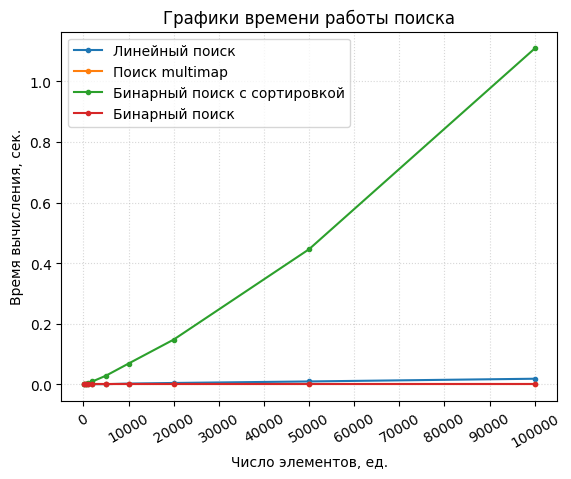

In [88]:
#графики
plt.plot(ns, t[0], marker='.')
plt.plot(ns, t[1], marker='.')
plt.plot(ns, t[2], marker='.')
plt.plot(ns, t[3], marker='.')
plt.xticks(np.arange(0, 100001, 10000), rotation=30)
#plt.yticks(rotation=70)
plt.xlabel("Число элементов, ед.")
plt.ylabel("Время вычисления, сек.")
plt.title("Графики времени работы поиска")
plt.legend(["Линейный поиск",
            "Поиск multimap",
            "Бинарный поиск с сортировкой",
            "Бинарный поиск"],
           loc = "upper left")
plt.grid(True, alpha = 0.5, ls = "dotted")

plt.savefig('mpLab2Graph1.png', bbox_inches='tight')